**Brian Blaylock**  
_January 13, 2021_

# Demo: Nightime IR overlay


In [1]:
import matplotlib.pyplot as plt

from goes2go import GOES

In [10]:
# Obtain a GOES ABI multichannel image
G = GOES(satellite=16, product="ABI", domain="C")
ds = G.nearesttime("2020-12-21 13:00")

📦 Finished downloading [1] files to [/home/blaylock/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


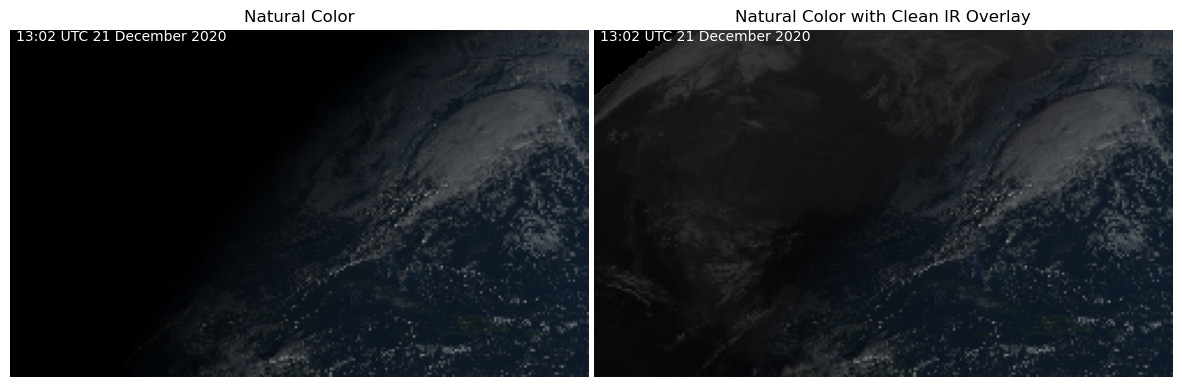

: 

In [11]:
# I only thin it to plot the image a little quicker because the full
# resolution of the data isn't distinguishable at the image resolution
nc = ds.thin(10).rgb.NaturalColor()
ncIR = ds.thin(10).rgb.NaturalColor(night_IR=True)

fig, axes = plt.subplots(1, 2, figsize=[15, 8], dpi=100)

text = ds.t.dt.strftime("%H:%M UTC %d %B %Y").item()

axes[0].axis("off")
axes[0].imshow(nc)
axes[0].set_title("Natural Color")
axes[0].text(0.01, 0.97, text, color="w", transform=axes[0].transAxes)

axes[1].axis("off")
axes[1].imshow(ncIR)
axes[1].set_title("Natural Color with Clean IR Overlay")
axes[1].text(0.01, 0.97, text, color="w", transform=axes[1].transAxes)

plt.subplots_adjust(wspace=0.01)

# plt.savefig(f"../docs/_static/Color-IR_demo", bbox_inches="tight")